# My First Notebook 
### Joshua Ag&#252ero
This is a Markdown cell. It is used for Titles and notation information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sci
plt.rcdefaults()

## Importing the .csv

In the cell below I used the variable df as a conventient way to refer to my dataframe. The data in this notebook was filtered from a larger dataframe. It is from a suvey off of StackOverflow.com of developers. In this case I fitered for out just the respondents from the United States, then chose to include their age, salary and the programming languages they work with. 

In [2]:
df = pd.read_csv('~/data projects/data/my_survey_df.csv')
#change the index from the default to the respondent's number
df.set_index('Respondent', inplace=True)
df.head(5)

,Age,Gender,YearsCode,ConvertedComp,LanguageWorkedWith,DatabaseWorkedWith,SocialMedia
Respondent,,,,,,,
4,22.0,Man,3,61000.0,C;C++;C#;Python;SQL,MySQL;SQLite,Reddit
13,28.0,Man,17,90000.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Couchbase;DynamoDB;Firebase;MySQL,Twitter
22,47.0,Man,35,103000.0,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,Elasticsearch;MySQL;Oracle;Redis,Instagram
23,22.0,Man,3,69000.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Oracle;SQLite,Reddit
26,34.0,Man,12,114000.0,Bash/Shell/PowerShell;C++;C#;HTML/CSS;JavaScri...,Microsoft SQL Server;MySQL;Redis;SQLite,I don't use social media


## Data inspection and cleaning

First inspect the data types for each collumn, then determine the nuber of NA values in neach column

from this info function we can dicover the shape ```(20949,7)``` as well as get info on the non-null calues in each collumn and their respective data types. This is useful compared to doing ``` df.shape()```, then ```df.columns```, then ```df.dtypes```, then finally ```df.notnull().sum()```. This gives you all of that info in fail swoop. Plus it sends back the file size at the bottom.

In [93]:
  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20949 entries, 4 to 88282
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 18864 non-null  float64
 1   Gender              20177 non-null  object 
 2   YearsCode           20790 non-null  object 
 3   ConvertedComp       14981 non-null  float64
 4   LanguageWorkedWith  20769 non-null  object 
 5   DatabaseWorkedWith  17576 non-null  object 
 6   SocialMedia         20046 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.8+ MB


In [82]:
#use this to return the number of null values in each column
df.isnull().sum()

Age                   2085
Gender                 772
YearsCode              159
ConvertedComp         5968
LanguageWorkedWith     180
DatabaseWorkedWith    3373
SocialMedia            903
dtype: int64

### Begin Data Wrangling for the first set of charts that compare the age and years of coding experience to the compensation of respondents

In [3]:
#create a series that filters by the respondent's age
agedf=df['Age']
agedf

Respondent
4        22.0
13       28.0
22       47.0
23       22.0
26       34.0
         ... 
78292    60.0
82717    44.0
83397    27.0
85642    34.0
88282     NaN
Name: Age, Length: 20949, dtype: float64

In [4]:
#create a series that filters by the respondent's years of coding experience
yearsdf=df['YearsCode']
yearsdf

Respondent
4                       3
13                     17
22                     35
23                      3
26                     12
               ...       
78292                  42
82717    Less than 1 year
83397                  12
85642                  20
88282                  38
Name: YearsCode, Length: 20949, dtype: object

In [102]:
#notice that there is a string response in the series above. This will need to be changed. So inspect the responses and look for any other strings. There are two in this case: 'Less than 1 year' and 'More than 50 years'
yearsdf.value_counts()

10                    1444
5                     1394
6                     1347
8                     1155
20                    1120
7                     1109
4                     1086
3                      928
15                     918
12                     845
9                      758
2                      676
25                     526
11                     506
18                     504
14                     500
30                     469
13                     465
16                     427
22                     359
17                     349
35                     328
19                     324
1                      316
23                     274
21                     263
40                     248
24                     204
Less than 1 year       198
38                     158
37                     142
28                     139
27                     126
32                     125
26                     120
33                     117
34                     113
3

In [132]:
#lastly created a series that filtered for the respondent's compensation
comp = df['ConvertedComp']
#this cleaned up the compensation responses to get rid of top and bottom quantiles, many responses were silly
compx = comp[comp.between(comp.quantile(.05), comp.quantile(.90))]
#this cleaned up the are responses to get rid of the top and bottom quantiles, some responses were silly
agex=agedf[agedf.between(agedf.quantile(.05), agedf.quantile(.90))]
#this concatenated the three series into a new cleaned up dataframe, I had trouble here because it was originally concatenating them end to end making a long series, but then I realized I needed to define the axis on which to match them up, in this case the axis=1 because they needed to be matched by collumn
newdf=pd.concat([compx,agex,yearsdf], axis=1)
#this line gets rid of any NA values
#newdf.dropna(inplace=True)
#In this situation there were values in the collumn that needed to be either removed or changed. In this case they were changed from str responses into int. 
newdf['YearsCode'].replace('Less than 1 year', 0, inplace=True)
newdf['YearsCode'].replace('More than 50 years', 51, inplace=True)
#here the entire series was changed to float, at which point the data could then be plotted on a box chart
newdf['YearsCode'] = newdf['YearsCode'].astype(float)
#this line sorts the dataframe in ascending order based on the collumn specified. I used it to find the lowest values in the age and yearscode collums, although there are funtions for that I could have used instead. This was easy as well
newdf.sort_values('YearsCode',ascending=False)

,ConvertedComp,Age,YearsCode
Respondent,,,
13005,NaN,NaN,51.0
49214,NaN,NaN,51.0
52130,NaN,NaN,51.0
68530,NaN,NaN,51.0
45923,NaN,NaN,51.0
...,...,...,...
83858,NaN,NaN,NaN
85097,NaN,NaN,NaN
88407,NaN,NaN,NaN


In [133]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20949 entries, 4 to 88880
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  12752 non-null  float64
 1   Age            16383 non-null  float64
 2   YearsCode      20790 non-null  float64
dtypes: float64(3)
memory usage: 654.7 KB


In [79]:
#now there are no null values in each column and all of the value types have been changed to float

## Correlation Check between variables 

This ```.corr()``` function checks for the strenth of correlation between variables in the datafram, this can be helpful to get an idea of what charts will be the most useful. A correlation above .05 is considered significant. 

In this case there is a very stron correlation between the variables selected, though there seems to be a stronger correlation between coding experience and compensation, as one might expect. 

There is also a very strong correlation between respondents' age and their coding experience. This would probably serve as the primary explanation for the increase in pay over the age of the respondent. 

In [106]:

corr = newdf.corr()

corr

,ConvertedComp,Age,YearsCode
ConvertedComp,1.000000,0.280507,0.360115
Age,0.280507,1.000000,0.691366
YearsCode,0.360115,0.691366,1.000000


This is a snippet of code that will provide a list of all the styles available for the plots in matplotlib. It is nice to be able to go through them all and see what they look like. 
```python3
print(plt.style.available)
```

<AxesSubplot:>

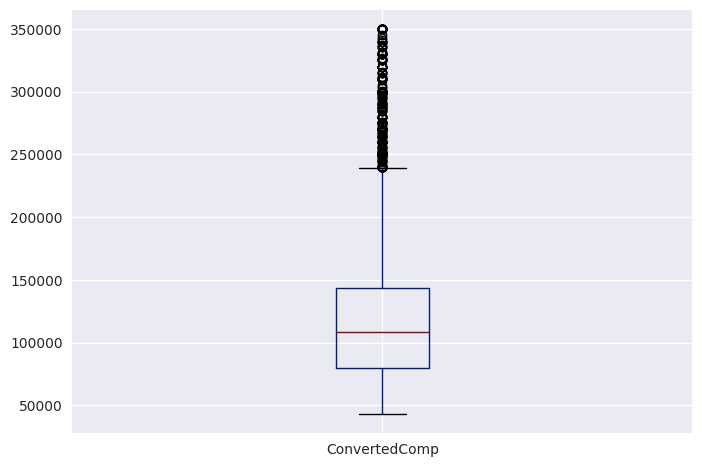

In [138]:
#here is where I began making tables and playing with the styles of each table. I should make them all one uniform style for coherence sake, but at this point I like seeing what they all look like.
plt.style.use('seaborn-dark-palette')
newdf.plot(kind='box',y='ConvertedComp')

<AxesSubplot:>

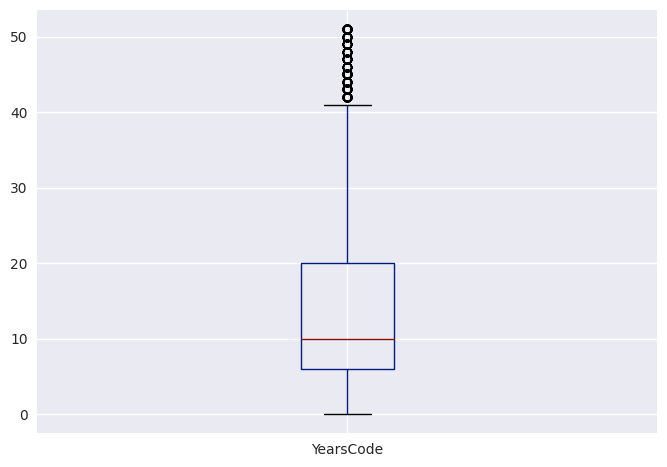

In [139]:
#newdf['YearsCode']
newdf.plot(kind='box', y='YearsCode')

In [11]:
#create a variable as a stand in for age
a=21
#create a list for the age, mean, and meadian compensation by age
agelis=[]
meanlis=[]
medianlis=[]
#a loop to run filter through the new dataframe by age and then be able to find the mean and median compensation for each age by year
while a>18 and a<44:
    #vaiable to creat series filtered by age
    age_df = newdf.groupby(['Age'])
    #this uses the filtered series and returns the dataframe (group) that surround it
    age_group=age_df.get_group(a)
    #find the mean and median and assign the values to a vaiable
    mea=age_group['ConvertedComp'].mean()
    med=age_group['ConvertedComp'].median()
    #print out all of the variables for preliminary analysis
    #print(" age=", a,"\nmean=", mea, "\nmedian=", med)
    #append all of the values to the lists created for them, this way each list can be used for plotting later
    agelis.append(a)
    meanlis.append(mea)
    medianlis.append(med)
    #advance the year counter one year to move on to the next round of stats, continue until all ages within the determined range have been accounted
    a+=1

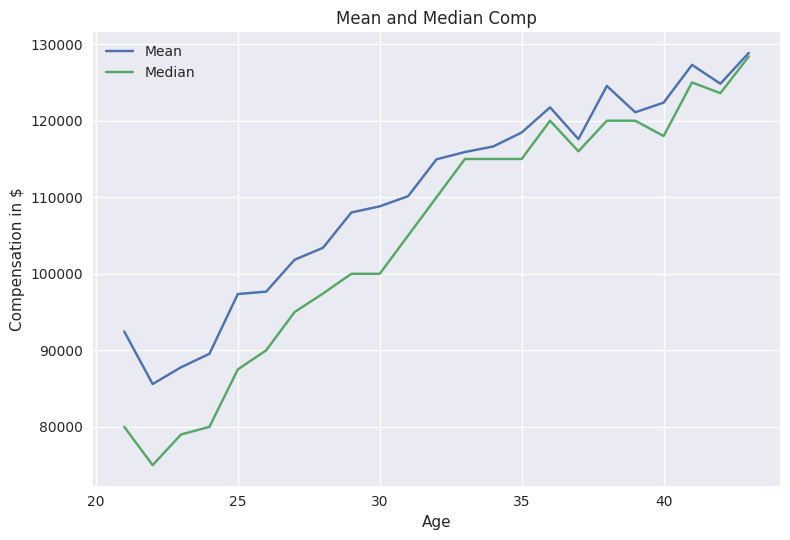

In [140]:
#now the age can be compared to the mean and median compensation, before cleaning out the outliersm the lines were quite disperate. Now they have a much stronger correlation to one another and converge as the age goes up. This is to be expected that younger respondents will have higher disparity in their offers, skills and truthfulness of their responses. As respondents grow older one might expext them to provide more honest responses and for the compensation of their skill to converge on its true value.
plt.style.use('seaborn')
plt.plot(agelis,meanlis,label='Mean')
plt.plot(agelis,medianlis,label='Median')
plt.title('Mean and Median Comp')
plt.xlabel('Age')
plt.ylabel('Compensation in $')
plt.legend()
plt.tight_layout()
#plt.savefig('mmc.png')
plt.show()

In [134]:
y=0
yrlis=[]
meanclis=[]
medianclis=[]
while y>=newdf['YearsCode'].min() and y<=newdf['YearsCode'].max():
    y_df = newdf.groupby(['YearsCode'])
    y_group=y_df.get_group(y)
    mea=y_group['ConvertedComp'].mean()
    med=y_group['ConvertedComp'].median()
    #print(" years coding=", y,"\nmean=", mea, "\nmedian=", med)
    yrlis.append(y)
    meanclis.append(mea)
    medianclis.append(med)
    y+=1


In [135]:
meanclis

[83805.60869565218,
 71455.6551724138,
 80786.94190871369,
 86659.60229885057,
 90842.57115749526,
 92817.91338582677,
 96697.89110225764,
 102590.99701492538,
 105805.82782369146,
 110884.0560165975,
 114477.58324382384,
 112744.41351351351,
 118113.95509499137,
 122419.30513595167,
 122518.25761772854,
 126510.38940809968,
 128222.3488372093,
 126509.58301158302,
 135137.46778711485,
 136838.1379310345,
 135997.40609137056,
 127267.38693467337,
 139895.23773584905,
 149902.70680628272,
 143434.62686567163,
 146299.15680473374,
 144773.85057471265,
 148672.52747252746,
 149304.61538461538,
 138337.94339622642,
 141067.97689768978,
 134962.12121212122,
 144603.125,
 137506.0,
 155384.1791044776,
 151258.18224299065,
 150679.86111111112,
 143820.9090909091,
 150856.101010101,
 137678.19512195123,
 143395.4714285714,
 156200.0,
 148466.66666666666,
 133392.85714285713,
 129787.36842105263,
 138622.07407407407,
 151300.0,
 124909.09090909091,
 148000.0,
 191457.77777777778,
 113250.0,
 14

In [130]:
count44=newdf['YearsCode']==44
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11120 entries, 4 to 88878
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  11120 non-null  float64
 1   Age            11120 non-null  float64
 2   YearsCode      11120 non-null  float64
dtypes: float64(3)
memory usage: 347.5 KB


In [131]:
count44.value_counts()

False    11120
Name: YearsCode, dtype: int64

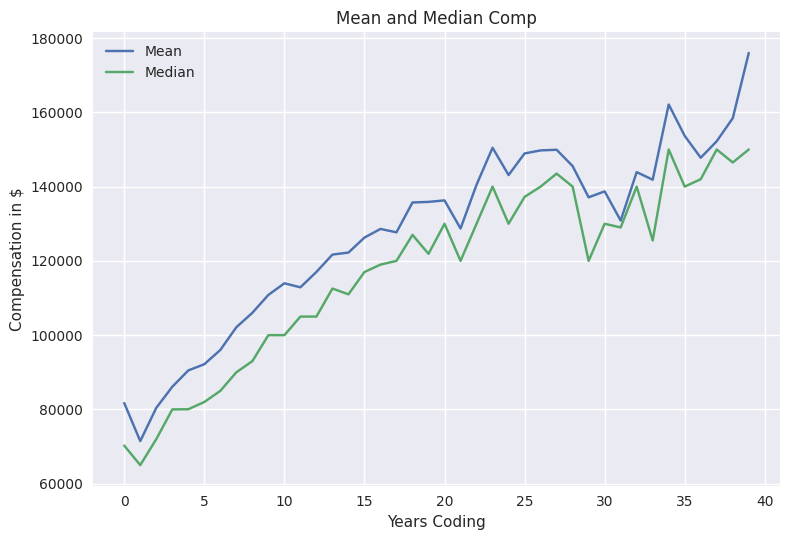

In [78]:
plt.style.use('seaborn')
plt.plot(yrlis,meanclis,label='Mean')
plt.plot(yrlis,medianclis,label='Median')
plt.title('Mean and Median Comp')
plt.xlabel('Years Coding')
plt.ylabel('Compensation in $')
plt.legend()
plt.tight_layout()
#plt.savefig('mmc.png')
plt.show()

The next set of tables that I would like to include in this report are ones that compare the most commonly worked with coding languages, data bases and social media sites (Circle chart) . I would like to compare the number of coding languages worked with and how it compares to compensation (line plot). Lastly I would like to compare the compensation for each coding language(line plot) and the average number of coding languages known (box and whisker) and then look at it by age (histogram).

## Export Notebook

 Use this code in order to export the notebook as an html file.

``` !jupyter nbconvert --to html mydfwithplt.ipynb ```
 
 Then open it in Chrome and in the three dot dropdown menu to the top righthand part of the browser, select print and then export as a pdf. 



